# Pari Pandey
# ITP 259 Fall 2023
# Final Project
# Problem 3

In [4]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.metrics import mean_squared_error, R2Score
import keras.metrics

1. Read the dataset into a dataframe. Parse the pickup_datetime so that it is read as a timestamp. (1)
2. Explore the dataset and determine what is the target variable. (1)
3. Drop factor(s) that are not likely to be relevant for predicting the taxi fare. (2)



In [5]:
taxi = pd.read_csv("/content/drive/MyDrive/ITP259/taxifares.csv")

y = taxi['fare_amount']

taxi.drop(columns = ['key'], inplace = True)

4.	Extract the weekday and the time (hours/minutes) from the pickup_datetime. Store in the data frame. Drop the pickup_datetime. (2)

In [6]:
taxi['pickup_datetime'] = pd.to_datetime(taxi['pickup_datetime'], utc=True)


taxi['weekday'] = taxi['pickup_datetime'].dt.weekday


"""I checked with Padmaja during Office Hours, and we are allowed to separate the time into 2 columns (rather than 1).
This helps retain precision in the case of decimals (for a combined hours/minutes time), and the instructions were a little unclear on 1 or 2 time columns.
"""

taxi['hours'] = taxi['pickup_datetime'].dt.hour
taxi['minutes'] = taxi['pickup_datetime'].dt.minute
taxi.drop(columns = 'pickup_datetime', inplace = True)

5.	Compute the distance between pickup and dropoff by using this approximate formula for relatively close points in the earth (e.g. within NYC)... (2)

6. After computing the distance, you can drop latitude and longitude columns. (1)

7. Assign X (features variables) and y (target variable) (1)

In [7]:
a = np.abs(taxi['pickup_longitude']-taxi['dropoff_longitude']) * 54.6
b = np.abs(taxi['pickup_latitude']-taxi['dropoff_latitude']) * 69.0
taxi['distance'] = np.sqrt(np.power(a,2) + np.power(b,2))


taxi.drop(columns = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], inplace = True)

# y already assigned above
X = taxi.iloc[:, 1:]

8. Build a keras sequential model with at least two dense layers. Number of neurons is your choice (> 50). Activation function is your choice. (3)

In [8]:
model = Sequential()
model.add(Input(shape = (5,)))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(75, activation = 'relu'))
model.add(Dense(25, activation = 'relu'))

9. Add a dense output layer. (2)
10. Compile the model with optimizer as adam, loss as mean squared error, metrics as mean squared error. (2)

In [9]:
model.add(Dense(1, activation = 'relu'))
model.summary()
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               600       
                                                                 
 dense_1 (Dense)             (None, 75)                7575      
                                                                 
 dense_2 (Dense)             (None, 25)                1900      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 10101 (39.46 KB)
Trainable params: 10101 (39.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


11.	Train the model. Partition with a split of 70/30. Epochs > 30. (2)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2023)

taxi_fares = model.fit(X_train, y_train, epochs = 50, verbose = True, validation_data = (X_test, y_test))

Epoch 1/50
1212/1212 [==============================] - 12s 4ms/step - loss: 70.1176 - mean_squared_error: 70.1176 - val_loss: 34.6865 - val_mean_squared_error: 34.6865
Epoch 2/50
1212/1212 [==============================] - 5s 4ms/step - loss: 29.7549 - mean_squared_error: 29.7549 - val_loss: 32.2645 - val_mean_squared_error: 32.2645
Epoch 3/50
1212/1212 [==============================] - 6s 5ms/step - loss: 28.9808 - mean_squared_error: 28.9808 - val_loss: 35.0955 - val_mean_squared_error: 35.0955
Epoch 4/50
1212/1212 [==============================] - 5s 4ms/step - loss: 28.1713 - mean_squared_error: 28.1713 - val_loss: 32.2561 - val_mean_squared_error: 32.2561
Epoch 5/50
1212/1212 [==============================] - 5s 4ms/step - loss: 28.4577 - mean_squared_error: 28.4577 - val_loss: 32.3557 - val_mean_squared_error: 32.3557
Epoch 6/50
1212/1212 [==============================] - 6s 5ms/step - loss: 28.1570 - mean_squared_error: 28.1570 - val_loss: 32.5373 - val_mean_squared_error:

12.	Display the plot of the training and validation MSE vs epoch. (2)

Text(0, 0.5, 'Mean Squared Error')

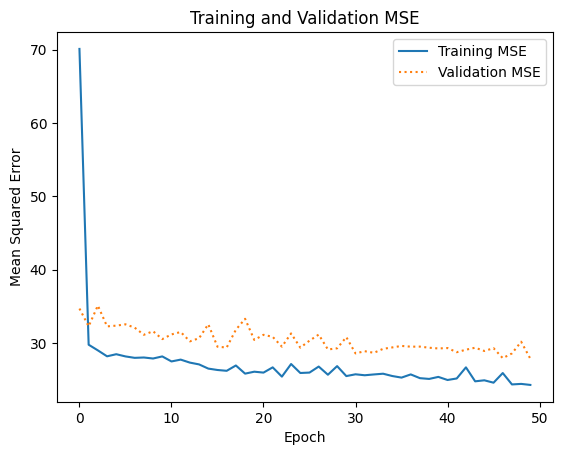

In [11]:
plt.plot(taxi_fares.history['mean_squared_error'])
plt.plot(taxi_fares.history['val_mean_squared_error'], linestyle = 'dotted')
plt.title("Training and Validation MSE")
plt.legend(["Training MSE", "Validation MSE"])
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")

In [12]:
y_pred = model.predict(X_test)

520/520 [==============================] - 1s 2ms/step


13.	Print the R-squared score. (1)

In [13]:
y_test = y_test[:,np.newaxis]

"""I used Keras's R2Score method/metric (from keras.metrics) to calculate the R2 score.
I checked with Padmaja, and it is fine.
The instructions didn't specify which method we're expected to use (alternative would've been sklearn.metrics.r2_score)."""

r_squared = R2Score()
r_squared.update_state(y_test, y_pred)
r_squared = r_squared.result()

<ipython-input-13-8a51cb7226a2>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_test = y_test[:,np.newaxis]


In [14]:
# This is the R2 score
print(r_squared)

tf.Tensor(0.7169092, shape=(), dtype=float32)


14.	Finally, print the prediction of taxi fare for 2 passengers riding 3.2 miles at 3:20 pm on a Friday. (3)

In [15]:
new_row = {'passenger_count': [2], 'weekday': [4], 'hours': [15], 'minutes':[20], 'distance':[3.2]}
new_row = pd.DataFrame(new_row)
result = model.predict(new_row)
print(result)

1/1 [==============================] - 0s 18ms/step
[[16.538517]]
